In [5]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 28*28))
x_test  = tf.reshape(x_test, (-1, 28*28))

# data normalization
x_train = x_train/127.5 - 1.0
x_test  = x_test/127.5 - 1.0

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [8]:
# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [9]:
# optimizer and loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, batch_size=256,
                    validation_data=(x_test, y_test),
                    epochs=150, verbose=2)

Epoch 1/150
235/235 - 3s - loss: 0.5027 - sparse_categorical_accuracy: 0.8203 - val_loss: 0.4271 - val_sparse_categorical_accuracy: 0.8452 - 3s/epoch - 13ms/step
Epoch 2/150
235/235 - 2s - loss: 0.3604 - sparse_categorical_accuracy: 0.8689 - val_loss: 0.3759 - val_sparse_categorical_accuracy: 0.8624 - 2s/epoch - 9ms/step
Epoch 3/150
235/235 - 2s - loss: 0.3247 - sparse_categorical_accuracy: 0.8806 - val_loss: 0.3644 - val_sparse_categorical_accuracy: 0.8704 - 2s/epoch - 9ms/step
Epoch 4/150
235/235 - 2s - loss: 0.2972 - sparse_categorical_accuracy: 0.8893 - val_loss: 0.3414 - val_sparse_categorical_accuracy: 0.8740 - 2s/epoch - 8ms/step
Epoch 5/150
235/235 - 2s - loss: 0.2770 - sparse_categorical_accuracy: 0.8975 - val_loss: 0.3463 - val_sparse_categorical_accuracy: 0.8751 - 2s/epoch - 7ms/step
Epoch 6/150
235/235 - 2s - loss: 0.2598 - sparse_categorical_accuracy: 0.9034 - val_loss: 0.3360 - val_sparse_categorical_accuracy: 0.8802 - 2s/epoch - 7ms/step
Epoch 7/150
235/235 - 2s - loss: 

Epoch 52/150
235/235 - 2s - loss: 0.0330 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.6524 - val_sparse_categorical_accuracy: 0.8895 - 2s/epoch - 7ms/step
Epoch 53/150
235/235 - 2s - loss: 0.0401 - sparse_categorical_accuracy: 0.9845 - val_loss: 0.6123 - val_sparse_categorical_accuracy: 0.8934 - 2s/epoch - 7ms/step
Epoch 54/150
235/235 - 2s - loss: 0.0361 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.7185 - val_sparse_categorical_accuracy: 0.8830 - 2s/epoch - 9ms/step
Epoch 55/150
235/235 - 2s - loss: 0.0392 - sparse_categorical_accuracy: 0.9855 - val_loss: 0.6624 - val_sparse_categorical_accuracy: 0.8944 - 2s/epoch - 9ms/step
Epoch 56/150
235/235 - 2s - loss: 0.0270 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.6849 - val_sparse_categorical_accuracy: 0.8931 - 2s/epoch - 9ms/step
Epoch 57/150
235/235 - 2s - loss: 0.0279 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.6818 - val_sparse_categorical_accuracy: 0.8923 - 2s/epoch - 9ms/step
Epoch 58/150
235/235 - 2s - 

Epoch 103/150
235/235 - 2s - loss: 0.0474 - sparse_categorical_accuracy: 0.9846 - val_loss: 0.9046 - val_sparse_categorical_accuracy: 0.8892 - 2s/epoch - 9ms/step
Epoch 104/150
235/235 - 2s - loss: 0.0325 - sparse_categorical_accuracy: 0.9895 - val_loss: 0.9089 - val_sparse_categorical_accuracy: 0.8948 - 2s/epoch - 9ms/step
Epoch 105/150
235/235 - 2s - loss: 0.0141 - sparse_categorical_accuracy: 0.9949 - val_loss: 0.9473 - val_sparse_categorical_accuracy: 0.8944 - 2s/epoch - 9ms/step
Epoch 106/150
235/235 - 2s - loss: 0.0155 - sparse_categorical_accuracy: 0.9944 - val_loss: 0.9636 - val_sparse_categorical_accuracy: 0.8941 - 2s/epoch - 9ms/step
Epoch 107/150
235/235 - 2s - loss: 0.0224 - sparse_categorical_accuracy: 0.9923 - val_loss: 0.9639 - val_sparse_categorical_accuracy: 0.8931 - 2s/epoch - 9ms/step
Epoch 108/150
235/235 - 2s - loss: 0.0240 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.9288 - val_sparse_categorical_accuracy: 0.8975 - 2s/epoch - 9ms/step
Epoch 109/150
235/235 

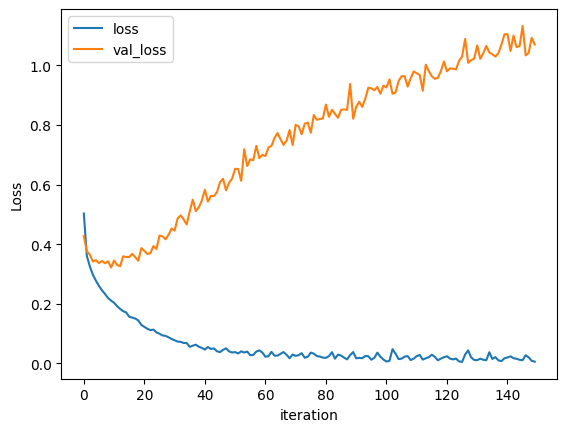

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

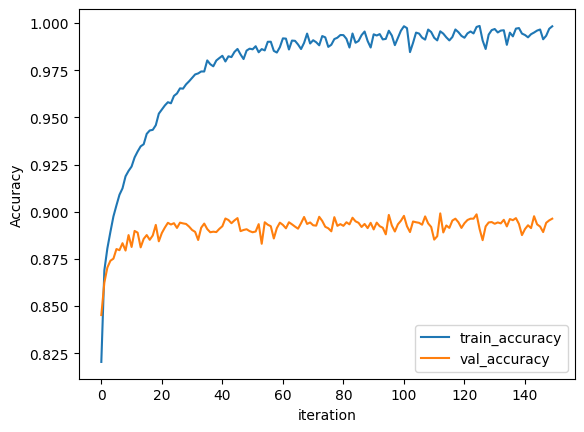

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [12]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()